<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# might be needed depending on your version of Jupyter
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
import datetime

In [2]:
#pip env
print(pd.__version__)

1.5.3


In [3]:
#conda env
print(pd.__version__)

1.5.3


In [4]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [8]:
df=pd.read_csv('../DATA/lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<Axes: xlabel='loan_status', ylabel='count'>

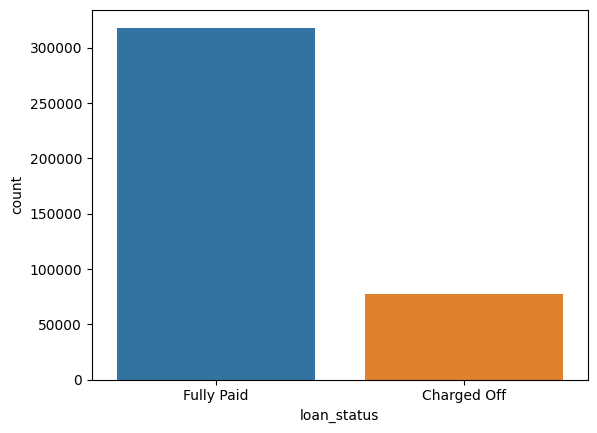

In [10]:
# CODE HERE
sns.countplot(x='loan_status',data=df)


C:\Users\matan.s\AppData\Local\Temp\ipykernel_30056\926802949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


<Axes: xlabel='loan_amnt'>

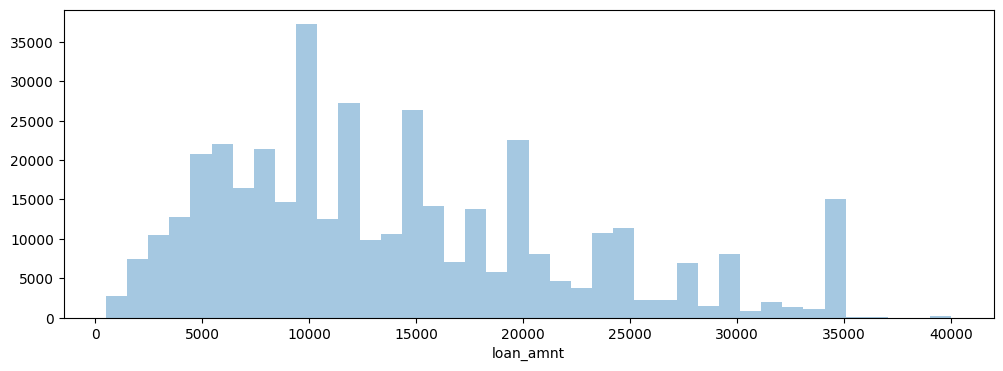

In [11]:
# CODE HERE
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)


**TASK: Create a histogram of the loan_amnt column.**

In [12]:
# CODE HERE

In [13]:
#alculate the correlation between all continuous numeric variables using .corr() method.
# df2=df.select_dtypes(include=['float64', 'int64'])  # This will select only numerical columns
df.corr()

C:\Users\matan.s\AppData\Local\Temp\ipykernel_30056\250517723.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

In [14]:
# CODE HERE
# CODE HERE
plt.figure(figsize=(12,7))
print(df.columns)
#create a heatmap of the correlation between the numerical columns 
#(you may have to rearrange the dataframe to do this correctly)
# sns.heatmap(df2.corr(),annot=True,cmap='viridis')

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')


<Figure size 1200x700 with 0 Axes>

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [15]:
# CODE HERE
# print(df['installment'].head())
# print(df['loan_amnt'].head())
#print the description of the installment column from the dataframe
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

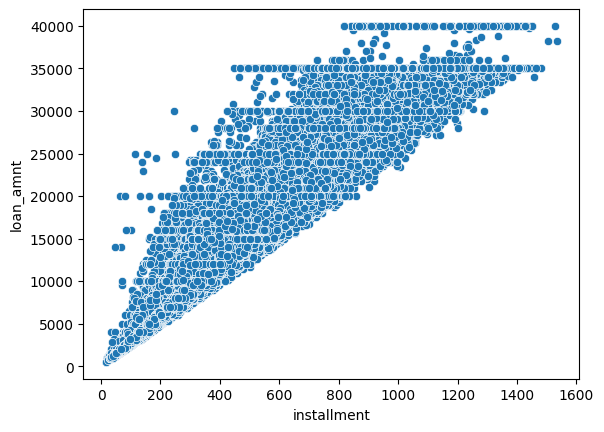

In [17]:
# CODE HERE
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

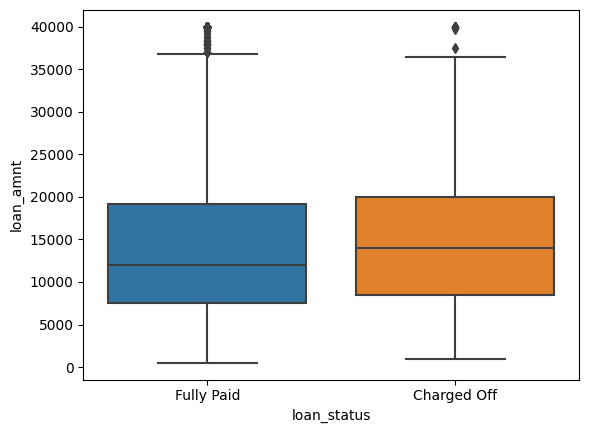

In [18]:
# CODE HERE
#create a boxplot showing the relationship between the loan_status and the Loan Amount
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [19]:
# CODE HERE
#calculate the summary statistics for the loan amount, grouped by the loan_status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [20]:
# CODE HERE
#show the Grade and sub_grade columns that LendingClub attributes to the loans
print(sorted(df['grade'].unique()))
print(sorted(df['sub_grade'].unique()))
#what are the unique possible subgrades



['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<Axes: xlabel='grade', ylabel='count'>

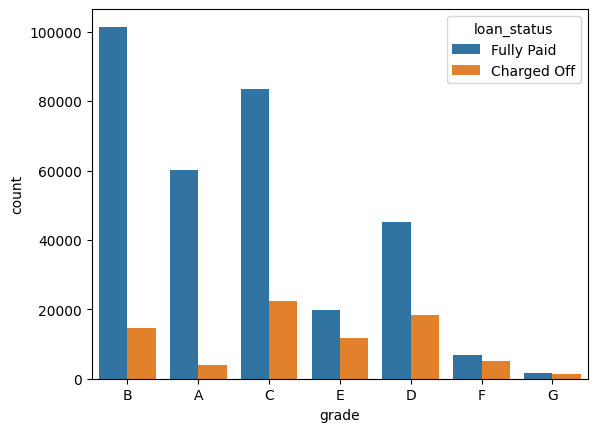

In [21]:
# CODE HERE
sns.countplot(x='grade',data=df,hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

<Axes: xlabel='sub_grade', ylabel='count'>

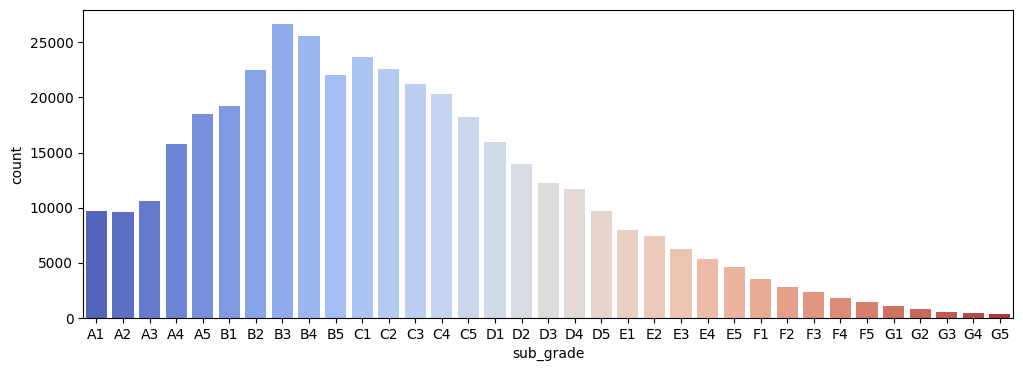

In [22]:
#CODE HERE
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')


<Axes: xlabel='sub_grade', ylabel='count'>

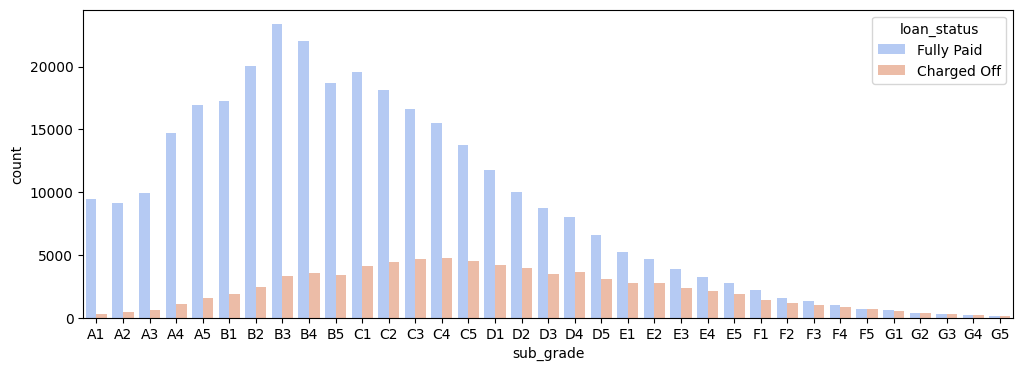

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

<Axes: xlabel='sub_grade', ylabel='count'>

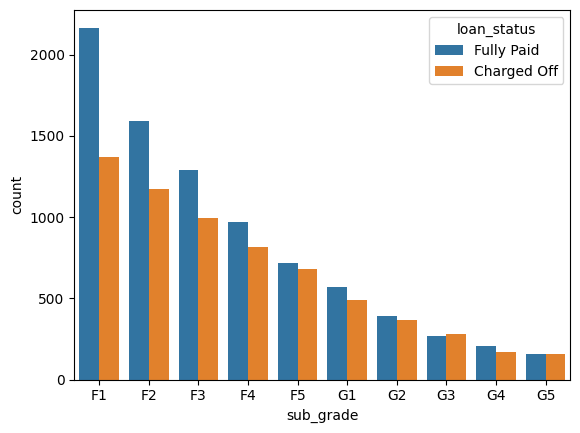

In [24]:
# CODE HERE
f_and_g=df[(df['grade']=='G') | (df['grade']=='F')]
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,hue='loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [25]:
# CODE HERE
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

C:\Users\matan.s\AppData\Local\Temp\ipykernel_30056\4108459882.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<Axes: >

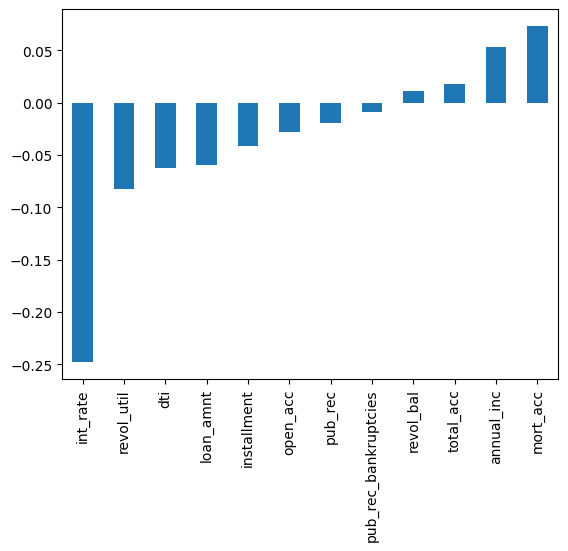

In [26]:
#CODE HERE
df[['loan_repaid','loan_status']]
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [27]:
# CODE HERE
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [28]:
# CODE HERE
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [29]:
# CODE HERE

In [30]:
#convert this Series to be in term of percentage of the total DataFrame
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [31]:
# CODE HERE

In [32]:
print(feat_info('emp_title'))
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**TASK: How many unique employment job titles are there?**

In [33]:
# CODE HERE

In [34]:
print(df['emp_title'].nunique())

173105


In [35]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [36]:
# CODE HERE

In [37]:
df=df.drop('emp_title',axis=1)

In [38]:
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [39]:
# CODE HERE
def convert_emp_length_to_int(s):
    # print(s,type(s))
    try:
        if type(s)==np.nan:
            return np.nan
        if s[0]=='1' and s[1]=='0':
            return 10
        elif s[0]=='<':
            return 0
        else:
            return int(s[0])
    except:
        print(s)

In [40]:
# emp_length_order=sorted(df['emp_length'].dropna().unique())
#make a copy of df
df2=df.copy()
df2.dropna(inplace=True)


In [41]:
df['emp_length']=df['emp_length'].apply(convert_emp_length_to_int)
# print(df['emp_length'].value_counts())

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

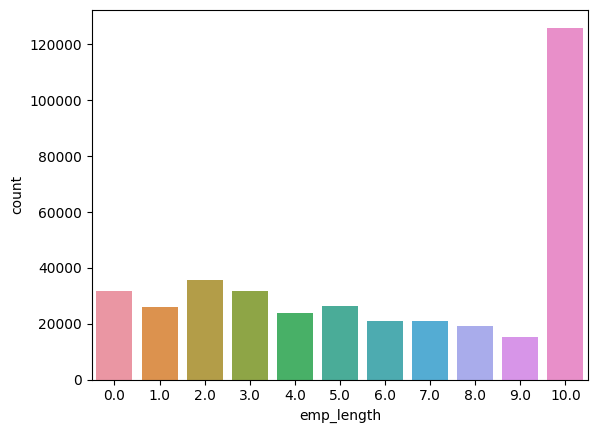

In [42]:
df['emp_length'].value_counts()
sns.countplot(x='emp_length',data=df)#hue='loan_status')

In [43]:
# CODE HERE
df.emp_length[:10]

0    10.0
1     4.0
2     0.0
3     6.0
4     9.0
5    10.0
6     2.0
7    10.0
8    10.0
9     3.0
Name: emp_length, dtype: float64

<Axes: xlabel='emp_length', ylabel='count'>

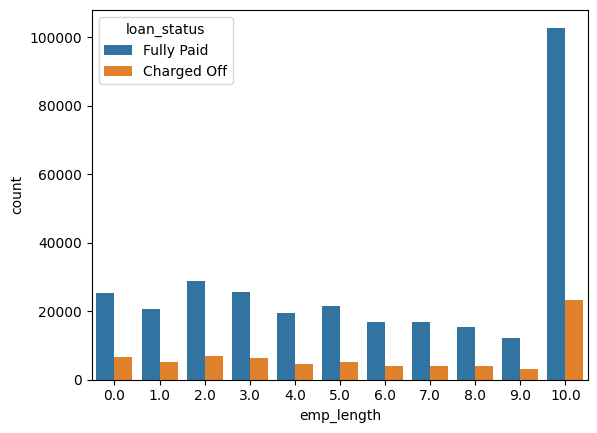

In [44]:
sns.countplot(x='emp_length',data=df,hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

<Axes: xlabel='emp_length'>

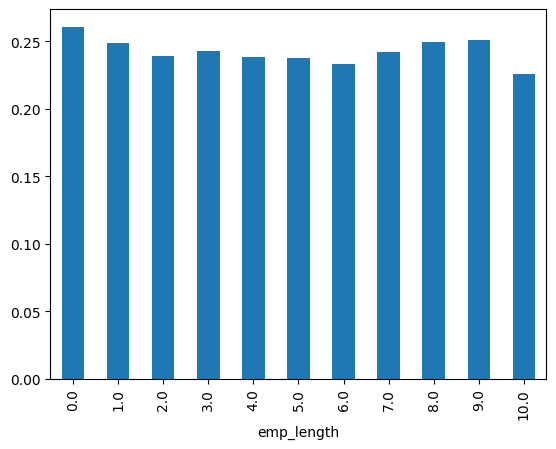

In [45]:
# CODE HERE
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_len=emp_co/emp_fp
emp_len.plot(kind='bar')



Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
None
The monthly payment owed by the borrower if the loan originates.
None


C:\Users\matan.s\AppData\Local\Temp\ipykernel_30056\1086355272.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_amnt'].sort_values().drop('loan_amnt').plot(kind='bar')


<Axes: >

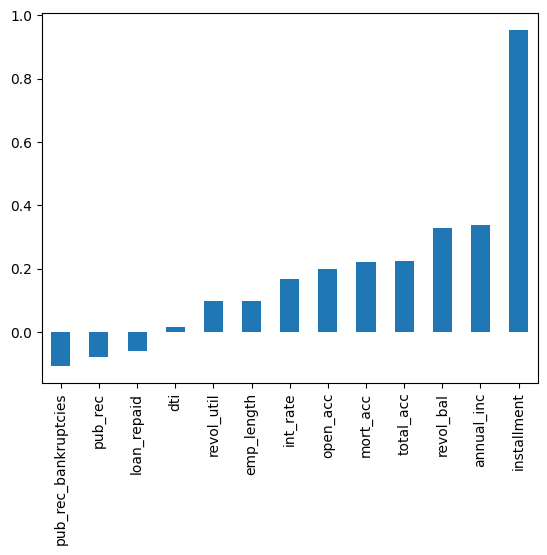

In [46]:
# CODE HERE
# print(df.head())
print(df.columns)
print(feat_info('loan_amnt'))
print(feat_info('installment'))
# print(feat_info('loan_repaid'))
#show the correlation between the loan_amnt and emp_length and loan_repaid
df.corr()['loan_amnt'].sort_values().drop('loan_amnt').plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [47]:
# CODE HERE

In [48]:
df.drop('emp_length',axis=1,inplace=True)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [50]:
# CODE HERE

In [51]:
# CODE HERE
df.purpose.value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [52]:
df.title.value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [53]:
# CODE HERE

df.drop('title',axis=1,inplace=True)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [54]:
# CODE HERE

feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [55]:
# CODE HERE

In [56]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

C:\Users\matan.s\AppData\Local\Temp\ipykernel_30056\2985039313.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')


<Axes: >

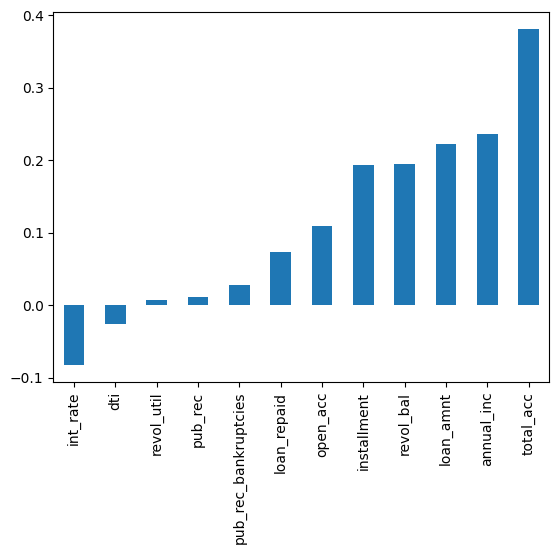

In [57]:
df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')

In [58]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [59]:
df.groupby('total_acc').mean()['mort_acc']


C:\Users\matan.s\AppData\Local\Temp\ipykernel_30056\3667835555.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [60]:
# CODE HERE
df2=df.copy()

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [61]:
#count how many missing values are there in the mort_acc column
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

# CODE HERE

df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

C:\Users\matan.s\AppData\Local\Temp\ipykernel_30056\731779883.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg=df.groupby('total_acc').mean()['mort_acc']


In [62]:
# CODE HERE
df['mort_acc'].value_counts()

0.000000     139779
1.000000      60416
2.000000      49949
3.000000      38049
4.000000      27887
              ...  
3.015267          1
3.285714          1
34.000000         1
3.584416          1
3.720588          1
Name: mort_acc, Length: 110, dtype: int64

In [63]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [64]:
df=df.dropna()

In [65]:
# CODE HERE

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [66]:
# CODE HERE

In [67]:
df['revol_util'].value_counts()

0.00      2183
53.00      752
60.00      738
61.00      734
55.00      730
          ... 
21.72        1
109.30       1
146.10       1
0.75         1
128.10       1
Name: revol_util, Length: 1226, dtype: int64

In [68]:
df['pub_rec_bankruptcies'].value_counts()

0.0    350108
1.0     42786
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [69]:
df.dropna(inplace=True)
print(df['revol_util'].value_counts())
print(df['pub_rec_bankruptcies'].value_counts())
print(df.isnull().sum())

0.00      2183
53.00      752
60.00      738
61.00      734
55.00      730
          ... 
21.72        1
109.30       1
146.10       1
0.75         1
128.10       1
Name: revol_util, Length: 1226, dtype: int64
0.0    350108
1.0     42786
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0

In [70]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [71]:
# CODE HERE

In [72]:
# df.info()
#find all the columns that are not numeric
temp=df.select_dtypes(['object'])
temp.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [73]:
# CODE HERE

In [74]:
print(df['term'].value_counts())

 36 months    301247
 60 months     93972
Name: term, dtype: int64


In [75]:
def convert_term_to_int(s):
    t=''
    if type(s)==str:
        t=s.strip()
    else:
        t=str(s)
    # t=s.strip()
    if t[0]=='3':
        return 36
    else:
        return 60

In [76]:
df['term']=df['term'].apply(convert_term_to_int)

In [77]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [78]:
# df['term']=df['term'].apply(convert_term_to_int)
# print(df['term'].value_counts())

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [79]:
# CODE HERE
grades=(df['grade'].value_counts().index)
grades_dic={}
for i in grades:
    res=(df[df['grade']==i]['loan_repaid'].value_counts())
    #what is the percentage of people who fully paid their loan in each grade
    grades_dic[i]=res[1]/(res[0]+res[1])
#sort the grades_dic
grades_dic=sorted(grades_dic.items(),key=lambda x:x[1],reverse=True)
grades_dic

[('A', 0.9370706881478706),
 ('B', 0.874279003902877),
 ('C', 0.7881351926258567),
 ('D', 0.711255602550344),
 ('E', 0.6262449486110669),
 ('F', 0.5721465076660988),
 ('G', 0.5215106732348112)]

<Axes: xlabel='sub_grade', ylabel='count'>

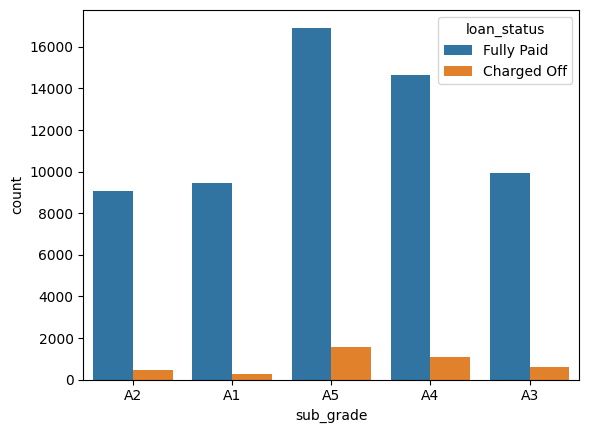

In [80]:
# #get the corrlation between grade and sub_grade

# set.intersection(df['grade'].values,df['sub_grade'].values)
df3=df[df.grade=='A']
#plot the loan_repaid column vs the sub_grade column
sns.countplot(x='sub_grade',data=df3,hue='loan_status')

In [81]:
df.drop('grade',axis=1,inplace=True)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [82]:
# CODE HERE

In [83]:
# Convert the subgrade into dummy variables
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)
subgrade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# CODE HERE

# Concatenate the dummy variables to the original dataframe

df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

<Axes: xlabel='loan_status', ylabel='count'>

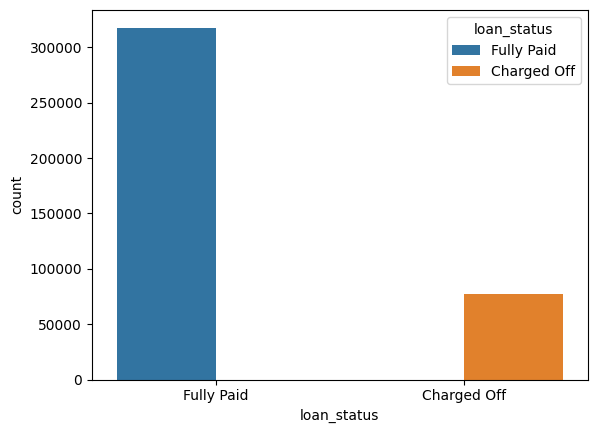

In [85]:
# CODE HERE

# Drop the grade column



# CODE HERE

# Create a count plot of the loan_status column with the hue based off of the loan_status column

sns.countplot(x='loan_status',data=df,hue='loan_status')




### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [86]:
# # CODE HERE

df2=df.copy()
# #show me only the verification_status,application_type,initial_list_status,purpose columns
# df2[['verification_status','application_type','initial_list_status','purpose']].head(20)

In [87]:
dum=pd.get_dummies(df,columns=['verification_status','application_type','initial_list_status','purpose'],drop_first=True)

In [88]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dum],axis=1)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [89]:
#CODE HERE
# df2=df.copy()   
df=pd.read_csv('temp.csv')

In [90]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,60,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,60,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,60,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,60,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#drop one of the home_ownership columns
def check_duplicated(df):
    dic={}
    for index in df.columns:
        if index.startswith('home_ownership'):
            print(index)
indexs=[]
i=0
for index in df.columns:
    if index.startswith('home_ownership'):     
        indexs.append(i)
    i+=1
print(indexs)

[4, 57]


In [92]:
df2['home_owenership']=df['home_ownership']

In [93]:
# df.home_owenership.value_counts()


**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [94]:
#CODE HERE

In [95]:
df.home_ownership.value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [144]:
df.drop('home_ownership',axis=1,inplace=True)

In [96]:
#build a simple dataframe with the home_ownership column and the dummy variables
df2=df.copy()
# df2['home_owenership']=df2['home_owenership'].replace(['NONE','ANY'],'OTHER')
# dum=pd.get_dummies(df2['home_owenership'],drop_first=True)
# df2=pd.concat([df2.drop('home_owenership',axis=1),dum],axis=1)
df2.head() 

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,60,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,60,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,60,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,60,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [97]:
#CODE HERE

In [98]:
zip_code=df['address'].apply(lambda x:x.split()[-1])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [99]:
zip_dumm=pd.get_dummies(zip_code,drop_first=True)
pd.concat([df.drop('address',axis=1),zip_dumm],axis=1)
df.drop('address',axis=1,inplace=True)

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [100]:
#CODE HERE

In [101]:
df['issue_d'].head()

0    Jan-2015
1    Jan-2015
2    Jan-2015
3    Nov-2014
4    Apr-2013
Name: issue_d, dtype: object

In [102]:
df['issue_d']=pd.to_datetime(df['issue_d'])

In [103]:
df['issue_d'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2014-11-01
4   2013-04-01
Name: issue_d, dtype: datetime64[ns]

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [104]:
#CODE HERE


In [105]:
temp=df['earliest_cr_line'].apply(lambda x:int(x.split('-')[-1]))


In [106]:
print(type(temp))
print(temp.head())  

<class 'pandas.core.series.Series'>
0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64


In [107]:
df['earliest_cr_year']=temp


In [108]:
print(df['earliest_cr_year'].head())
df.drop('earliest_cr_line',axis=1,inplace=True)

0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_year, dtype: int64


In [29]:
#save the dataframe to a csv file
# df.to_csv('df_end_S2.csv',index=False)


## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [30]:
df=pd.read_csv('df_end_S2.csv')

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [110]:
# CODE HERE

In [12]:
# df.drop('loan_status',axis=1,inplace=True)
# df.to_csv('df_end_S2.csv',index=False)

In [31]:
# df['loan_repaid']=df['loan_repaid'].apply(lambda x:1 if x=='Fully Paid' else 0)
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

**TASK: Set X and y variables to the .values of the features and label.**

In [111]:
#CODE HERE

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [32]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))


395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [113]:
#CODE HERE

In [33]:
#print all the data types of the columns that is not numeric
non_numeric=df.dtypes[df.dtypes!='int64'][df.dtypes!='float64']
#drop all the columns that are not numeric
df.drop(non_numeric.index,axis=1,inplace=True)
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [36]:
df.dtypes.value_counts()

int64      91
float64    24
dtype: int64

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [37]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler


In [38]:
scalar=MinMaxScaler()

In [39]:
X_train_s=scalar.fit_transform(X_train)

In [40]:
X_test_s=scalar.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [41]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

In [57]:

# Define the model
model = Sequential()

# First hidden layer with 78 nodes


model.add(Dense(78, activation='relu'))

# Second hidden layer with 39 nodes
model.add(Dense(39, activation='relu'))

# Third hidden layer with 19 nodes
model.add(Dense(19, activation='relu'))

# Output layer with 1 node
model.add(Dense(1, activation='sigmoid'))  # or 'linear' for regression

# Compile the model
model.compile(loss='binary_crossentropy',  # or 'mean_squared_error' for regression
              optimizer='adam',
              metrics=['accuracy'])  # or other metrics depending on your problem


**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [117]:
# CODE HERE

In [58]:
model.fit(x=X_train_s,y=y_train,epochs=25,batch_size=256,validation_data=(X_test_s,y_test))

Epoch 1/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.0276 - accuracy: 0.9880 - val_loss: 2.1596e-05 - val_accuracy: 1.0000
Epoch 2/25
1236/1236 [==============================] - 1s 1ms/step - loss: 1.0190e-05 - accuracy: 1.0000 - val_loss: 4.6018e-06 - val_accuracy: 1.0000
Epoch 3/25
1236/1236 [==============================] - 1s 1ms/step - loss: 2.7788e-06 - accuracy: 1.0000 - val_loss: 1.6167e-06 - val_accuracy: 1.0000
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 1.0646e-06 - accuracy: 1.0000 - val_loss: 6.7808e-07 - val_accuracy: 1.0000
Epoch 5/25
1236/1236 [==============================] - 2s 1ms/step - loss: 4.6538e-07 - accuracy: 1.0000 - val_loss: 3.0990e-07 - val_accuracy: 1.0000
Epoch 6/25
1236/1236 [==============================] - 2s 1ms/step - loss: 2.1706e-07 - accuracy: 1.0000 - val_loss: 1.4782e-07 - val_accuracy: 1.0000
Epoch 7/25
1236/1236 [==============================] - 1s 1ms/step - loss: 1.0438e-07 - acc

In [60]:
losses=pd.DataFrame(model.history.history)

<Axes: >

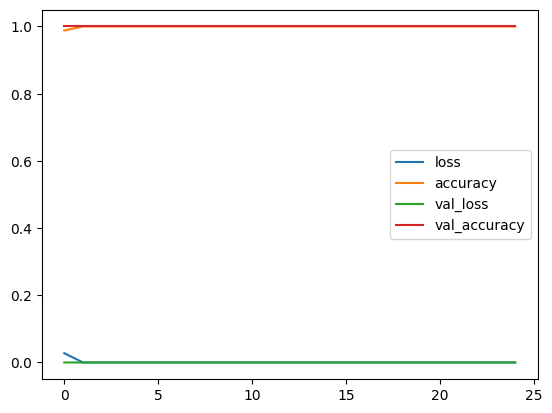

In [61]:
losses.plot()

**TASK: OPTIONAL: Save your model.**

In [28]:
# CODE HERE
print(history.history['loss'])
print(history.history['val_loss'])

[4.606217074432095e-10, 4.5182921293296374e-10, 4.479647763844241e-10, 4.718486157351265e-10, 4.4786732655843764e-10, 4.450715906934022e-10, 4.5124937120277764e-10, 4.4850398395190894e-10, 4.359771710316096e-10, 4.359283489741017e-10, 4.3774112112870966e-10, 4.449421664443065e-10, 4.5370798784638566e-10, 4.536657438602987e-10, 4.4222614459243914e-10, 4.672627285096098e-10, 4.4402748144989346e-10, 4.5389494940373254e-10, 4.53589971138868e-10, 4.6253867402867854e-10, 4.5654213742807315e-10, 4.489414673347625e-10, 4.6265927200472845e-10, 4.614786885959177e-10, 4.597868197286914e-10, 4.5959244743265515e-10, 4.686048771240792e-10, 4.66318927916376e-10, 4.5974446472030195e-10, 4.5827117101104875e-10]
[4.635107297978891e-10, 4.599848280051333e-10, 4.776058992739252e-10, 4.424008104297883e-10, 4.600040626190349e-10, 4.666110275941548e-10, 4.474659254238844e-10, 4.469166148268755e-10, 4.2517314668977235e-10, 4.518257434860118e-10, 4.521559238135353e-10, 4.4896503181846015e-10, 4.621169558127747

In [44]:
model.save('full_data_project_model.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [119]:
# CODE HERE

In [62]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,2.759472e-02,0.988007,2.159575e-05,1.0
1,1.019012e-05,1.000000,4.601836e-06,1.0
2,2.778758e-06,1.000000,1.616746e-06,1.0
3,1.064554e-06,1.000000,6.780836e-07,1.0
4,4.653815e-07,1.000000,3.098957e-07,1.0


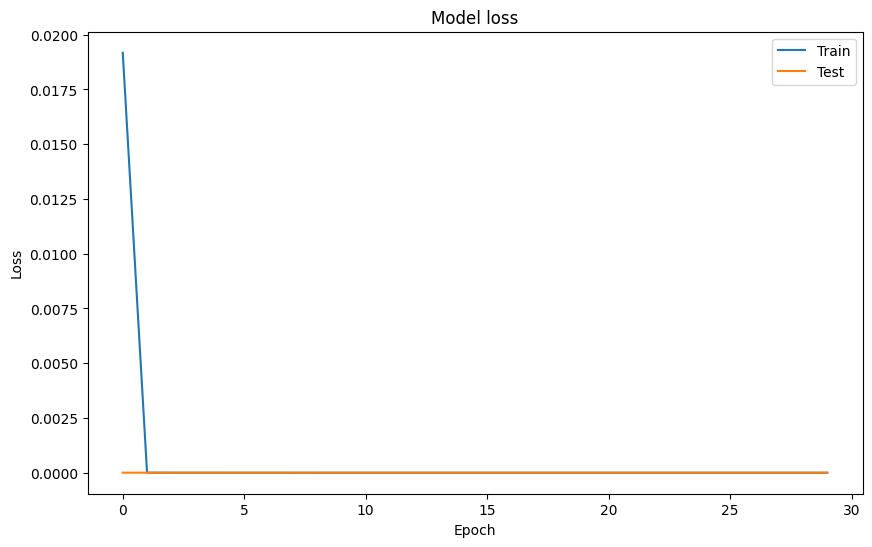

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [66]:
# CODE HERE
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
pred=model.predict(X_test_s)

2471/2471 [==============================] - 1s 540us/step


In [69]:
print(classification_report(y_test,pred>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15658
           1       1.00      1.00      1.00     63386

    accuracy                           1.00     79044
   macro avg       1.00      1.00      1.00     79044
weighted avg       1.00      1.00      1.00     79044



In [70]:
confusion_matrix(y_test,pred>0.5)

array([[15658,     0],
       [    0, 63386]], dtype=int64)

**TASK: Given the customer below, would you offer this person a loan?**

In [98]:
import random
# random.seed(101)
r=[]
for i in range(100):
    random_ind = random.randint(0,len(df))

    new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
    if new_customer.shape==(114,):
        new_customer=new_customer.values.reshape(1,114)
        r.append(new_customer)
    # r.append(new_customer)
# new_customer = pd.DataFrame(r)
# new_customer.apply(lambda x:x.values.reshape(1,114))

In [99]:
# CODE HERE
print(len(r))

100


In [106]:
pred=np.array(r)
for i in range(100):
    print(model.predict(pred[i]))

1/1 [==============================] - 0s 18ms/step
[[0.]]
1/1 [==============================] - 0s 25ms/step
[[0.]]
1/1 [==============================] - 0s 19ms/step
[[0.]]
1/1 [==============================] - 0s 17ms/step
[[0.]]
1/1 [==============================] - 0s 16ms/step
[[0.]]
1/1 [==============================] - 0s 17ms/step
[[0.]]
1/1 [==============================] - 0s 18ms/step
[[0.]]
1/1 [==============================] - 0s 18ms/step
[[0.]]
1/1 [==============================] - 0s 16ms/step
[[0.]]
1/1 [==============================] - 0s 17ms/step
[[0.]]
1/1 [==============================] - 0s 16ms/step
[[0.]]
1/1 [==============================] - 0s 16ms/step
[[0.]]
1/1 [==============================] - 0s 22ms/step
[[0.]]
1/1 [==============================] - 0s 18ms/step
[[0.]]
1/1 [==============================] - 0s 17ms/step
[[0.]]
1/1 [==============================] - 0s 17ms/step
[[0.]]
1/1 [==============================] - 0s 17ms/step
[[0.

**TASK: Now check, did this person actually end up paying back their loan?**

In [123]:
# CODE HERE

# GREAT JOB!

Sure, here is a step-by-step guide on how to build a machine learning model:

Define the problem. What is the goal of your machine learning model? What data do you have available? What kind of output are you looking for?
Choose a machine learning algorithm. There are many different machine learning algorithms available, each with its own strengths and weaknesses. Do some research to find an algorithm that is well-suited for your problem.
Prepare the data. Machine learning algorithms can be sensitive to the quality of the data. Make sure that your data is clean and well-formatted. You may need to perform data cleaning, feature engineering, and dimensionality reduction.
Train the model. Once you have prepared the data, you can train the machine learning model. This involves feeding the data to the model and allowing it to learn from the data.
Evaluate the model. Once the model has been trained, you need to evaluate its performance. This can be done by using a holdout dataset or by using cross-validation.
Deploy the model. Once you are satisfied with the performance of the model, you can deploy it. This may involve making the model available to users or integrating it into an application.
Here are some additional tips for building machine learning models:

Start small. Don't try to build a complex model right away. Start with a simple model and then gradually add complexity as needed.
Use a framework. There are many machine learning frameworks available, such as scikit-learn, TensorFlow, and PyTorch. Using a framework can make it easier to build and train machine learning models.
Get help. There are many resources available to help you build machine learning models. You can find books, tutorials, and online forums that can provide you with guidance.
Building machine learning models can be a challenging but rewarding experience. By following these steps, you can build models that can solve real-world problems.

